<a href="https://colab.research.google.com/github/basangoudapatil/Final_Project/blob/main/Final_project_cust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering for Customer DataSet

# **Import necessary libraries and the read the dataset**

In [113]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [88]:
df = pd.read_excel('/content/cust_data.xlsx')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Thoroughly check the dataset for null values, duplicates etc, and also check if the data is balance or imbalanced.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

From the above info it is clear that on;y Gender column has nan values. Therefore, I check it and fill it with appropriate value.

Check for null-values in the data 

In [90]:
df['Gender'].isna().sum()

2724

Check the count of each variable in the Gender column.

In [91]:
df['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

As the frequency of female is high (i.e., mode), I will replace nan values with F.

In [92]:
df['Gender'].fillna('F', inplace = True)

In [93]:
df['Gender'].isna().sum()

0

In [94]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# **Data Vizualization**

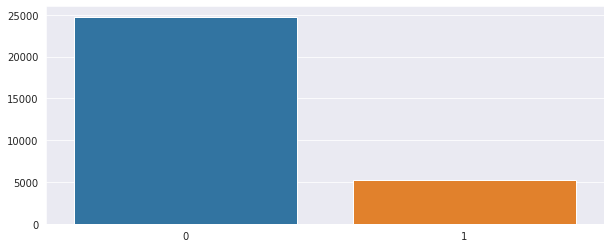

In [114]:
# male and female population
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

From the above Graph Female population is higher than the male population, therefore it is clear that female do online shopping regularly as compared to male

In [115]:
df['Orders'].unique()

array([ 7,  0, 10,  4,  6,  9,  1,  8,  5,  3,  2, 11, 12])

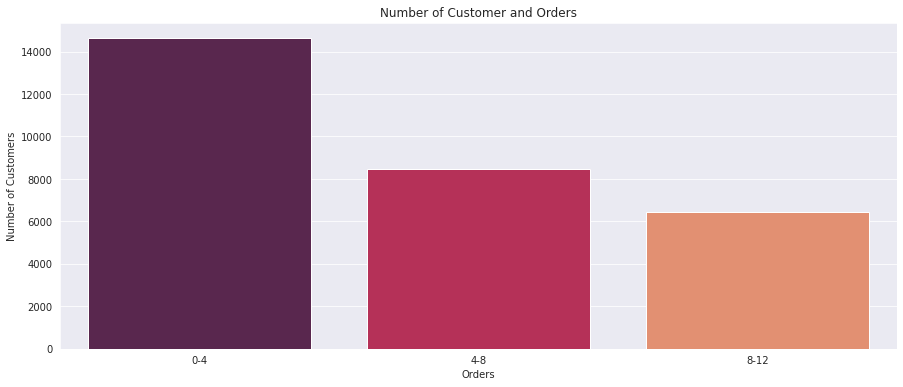

In [117]:
orders0_4 = df.Orders[(df.Orders < 4) & (df.Orders >= 0)]
orders4_8 = df.Orders[(df.Orders < 8 ) & (df.Orders >= 4)]
orders8_12 = df.Orders[(df.Orders < 12) & (df.Orders >= 8)]

x = ["0-4","4-8","8-12"]
y = [len(orders0_4.values),len(orders4_8.values),len(orders8_12.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Orders")
plt.xlabel("Orders")
plt.ylabel("Number of Customers")
plt.show()

From the above Graph ther are 3 clear clusters, where the 1st one orders between 0-4 gain the highest population, i.e., customers ordering goods <4 number of times. 

In [95]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [96]:
df = df.drop([
              'Jordan',
              'Gatorade',
              'Samsung',
              'Asus',
              'Udis',
              'Mondelez International',
              'Wrangler',
              'Fila',
              'Brooks',
              'H&M',
              'Dairy Queen',
              'Fendi',
              'Hewlett Packard',
              'Pladis',
              'Asics',
              'Siemens',
              'J.M. Smucker',
              'Pop Chips',
              'Juniper',
              'Huawei',
              'Compaq',
              'IBM',
              'Burberry',
              'Mi',
              'LG',
              'Dior',
              'Scabal',
              'Tommy Hilfiger',
              'Hollister',
              'Forever 21',
              'Colavita',
              'Microsoft',
              'Jiffy mix',
              'Kraft'], axis=1)

In [97]:
df = df.drop(['Vans'], axis = 1)

In [98]:
df = df.drop(['Cust_ID'], axis =1)

In [99]:
df.head()

,Gender,Orders
0,1,7
1,0,0
2,1,7
3,0,0
4,0,10


# **K-means clustering Model**

In [107]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df)

km = KMeans(n_clusters = 3)
km.fit(X_std)

KMeans(n_clusters=3)

Determining K

Text(0, 0.5, 'Inertia')

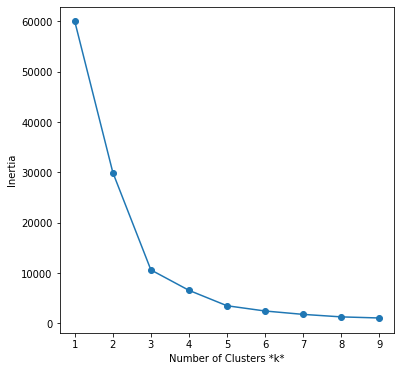

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

inertias = []
list_k = list(range(1,10))

for k in list_k:
  km = KMeans(n_clusters=k)
  km.fit(X_std)
  inertias.append(km.inertia_)

plt.figure(figsize=(6,6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of Clusters *k*')
plt.ylabel('Inertia')

From the above elbow plot, at point 3 the line takes a sharp turn, therefore, the hyperparameter i.e., n_clusters is 3. 